# Урок 2. Профилирование пользователей. Сегментация аудитории: unsupervised learning (clustering, LDA/ARTM), supervised (multi/binary classification)#

План занятия:

1. задача сегментации аудитории
2. тематическое моделирование - получаем эмбединги текстов
3. решаем задачу профилирования аудитории новостного портала

Рассматривать мы все будем в контексте решения конкретной прикладной задачи - задачи оттока

## Задача сегментации

<img src='https://drive.google.com/uc?export=view&id=1fH4dMvgSLT1u9nGc3DCxOI3YGJIkh5dj' width=600>

Разбиваем пользователей на группы, чем-то отличающиеся друг от друга.

Или же:

Сегментация клиентской базы — это способ повышения эффективности работы с пользователями путем их распределения по отдельным группам, или сегментам, в соответствии с их запросами и/или потребностями.

## Виды сегментации

### **1. когда совершил первую покупку (сколько прошло с момента регистрации до момента покупки)**

К примеру, есть сервис по заказу пиццы. Вначале пользователю нужно научиться пользоваться этим ПО, затем нужно сделать первый заказ, а затем пользователь может приходить всё реже и реже, а затем он нас покидает (из-за проблем в сервисе или из-за невкусной пиццы) - это нормальный живой цикл общения.

Это наблюдается в любой системе, где есть работа с клиентами.

Особенно, это известно маркетингу: сначала сотрудники помогают клиенту разобраться в продукте, затем они его поддерживают на пути пользования продуктом, а затем они общаются с ним, дабы клиент не ушел.


<img src='https://drive.google.com/uc?export=view&id=1wf6GFpfQNuxOGJ4xL0n4jb8hvVJjnTGF' width=600>

### **2. по психотипам**

Есть люди, которые делают покупки импульсивно, а есть те, которые всё тщательно обдумывают. И с ними нужно разговаривать по-разному.

<img src='https://drive.google.com/uc?export=view&id=1BRkfhmL1lwxOewbJvw46q8vZnPCAEqAp' width=600>

### **3. по платежам**

Интерес к покупателям, которые приходят к нам раз в год и платят по три копейки и к покупателям, которые приходят каждую неделю и оставляют по 100р, совершенно разный.

 <img src='https://drive.google.com/uc?export=view&id=1-ggaCJCNNV-XyFT2_tHfdjlmYefO85i4' width=800>

### **4. По эффективности взаимодействия (uplift)**

Актуально для телекома. 

Есть несколько групп клиентов:
1. Лояльные - совершают покупку и без нашего взаимодействия и с ним
2. Убеждаемые - совершат покупку только после нашего взаимодействия, без него не сделают покупку
3. Потерянные - не совершат покупку никогда, хоть мы им позвоним, хоть и не будем звонить
4. "не беспокоить" - совершат покупку, если мы их не будем тревожить, если потревожим, то потеряем покупателя.


<img src='https://drive.google.com/uc?export=view&id=1L0TJ8fK3YxuAzc52lz5SE2bgbwLBoS2J' width=500>

### **5. по интересам**

Пример: если человек искал, где купить десткое питание, то можем ему порекомендовать купить и памперсы.

<img src='https://drive.google.com/uc?export=view&id=1Ud1G7YC8eN8qxbCbidNhgd2e-EoEryfl' width=600>

Особенно выгодно профилировать пользователей по социальным сетям. Ведь любое действие и бездействие человека - это данные.
- Подписались на страницу
- Отписались от страницы
- Лайкнули новость
- Проигнорировали новость
- Добавили в избранное
- и т.д.

От этого контента зависят рекламные компании, которые настраиваются на определенную группу пользователей и на вас (а если точнее, не на вас самих, а на образ, который вы создаете в сети).

И еще куча вариантов сегментирования, которое может быть полезно. 

Для чего полезно?

1. понимание аудитории, способность описать основные группы пользователей и их интересы
2. выявление сегментов с максимальной монетизацией
3. выбор маркетинговой стратегии
4. налаживание эффективного взаимодействия с пользователями

## Пример (новостной портал)

Представим, что мы - компания-агрегатор новостей (новостной портал). И мы хотим построить модель прогнозирования оттока клиентов.

У нас есть:

1. читатели
2. новости

Для каждого пользователя мы можем за какой-то период (например, 1 день) достать из базы данных список прочитанных им новостей.

Для каждой новости мы можем вытащить текст и метаинформацию.


<img src='https://drive.google.com/uc?export=view&id=1OLrm1Rx9VjRVHbBW25Gi_mfUjY-WhB3p' width=700>

Нужно построить модель прогнозирования оттока. 


Нам нужны:

1. векторное представление пользователя
2. сегменты, описывающие интересы пользователя

p.s. в контексте нашей задачи - это одно и то же

Есть два очевидных варианта как это сделать:

1. многоклассовая классификация
    - **Проблема:**
    для классификации нам нужно сначала разметить новости - привлечение ручного труда
2. кластеризация документов с последующей попыткой их (кластера) интерпретировать

### Задача тематического моделирования (LDA)

LDA - Latent Dirichlet allocation

Терминология:

1. документ - коллекция слов 
2. тема - набор токенов (слов), совместно часто встречающихся в документах

- на свете бывают темы (заранее неизвестные), которые отражают то, о чём могут быть части документа;
- каждая тема – это распределение вероятностей на словах, т.е. мешок слов, из которого можно с разной вероятностью вытащить разные слова;

<img src='https://drive.google.com/uc?export=view&id=10hJ_zkUHDK1-hAYcdxUix5r9Wyaik9TA' width=500>


- каждый документ – это смесь тем, т.е. распределение вероятностей на темах, кубик, который можно кинуть *(тема искусства включает в себя не только слова балет и танцы, но и финансы, и кредиты)*; каждая тема в документе будет представлена в разных пропорциях (*если написал руководитель театра, то будет больше про танцы, а если написал министр культуры, то скорее про финансы, но везде говорим про искусство*)

<img src='https://drive.google.com/uc?export=view&id=1o7Bvl_2sscs3ldpxo4faqXCDIqTbkO8H' width=500>

- процесс порождения каждого слова состоит в том, чтобы сначала выбрать тему по распределению, соответствующему документу, а затем выбрать слово из распределения, соответствующего этой теме.

Предположим, что у нас есть несколько предложений:

1. I like to eat broccoli and bananas.
2. I ate a banana and spinach smoothie for breakfast.
3. Chinchillas and kittens are cute.
4. My sister adopted a kitten yesterday.
5. Look at this cute hamster munching on a piece of broccoli.

LDA - это метод для автоматического поиска тем, которые есть в предложениях. К примеру, если мы передадим эти предложения в модель и попросим найти 2 темы, то может получить что-то подобное:

- Предложения 1 и 2: 100% Topic A
- Предложения 3 и 4: 100% Topic B
- Предложение 5: 60% Topic A, 40% Topic B

<br>

- Topic A: 30% broccoli, 15% bananas, 10% breakfast, 10% munching, … (уже сейчас можем понять, что topic A о еде)
- Topic B: 20% chinchillas, 20% kittens, 20% cute, 15% hamster, … (topic B о милых животных)

Ну и конечно же вопрос, как LDA это делает?

Вероятностные модели удобно понимать и представлять в виде порождающих процессов (generative processes), когда мы последовательно описываем, как порождается одна единица данных, вводя по ходу дела все вероятностные предположения, которые мы в этой модели делаем. Соответственно, порождающий процесс для LDA должен последовательно описывать, как мы порождаем каждое слово каждого документа. И вот как это происходит:


0. Выбрать количество тем N
1. Случайно присвоить каждое слово в каждом документе к одной из N тем
    * *Заметьте, что это рандомное присвоение уже даёт распределение тем в документах и распределение слов во всех темах (но конечно не самого лучшего качества)*

2. Для каждого слова $w$ в документе $d$:
 * И для каждой темы $t$, посчитать две вероятности:
    * *предположить, что все присвоенные темы документы правильные за исключением одной, с которой работаем*
    1. $p(t|d)$ - Вероятность слов в документе, которые присвоены к теме
    2. $p(w|t)$ - Вероятность принадлежности слов из всех документов к теме $t$
 * Переопределить тему слова $w$, с помощью вероятности $p(t|d)*p(w|t)$ (опираясь на нашу модель, это вероятность того, что тема $t$ генерирует слово $w$)

3. В конечном счете достигнется стабильное состояние, когда присвоения имеют смысл.

Бросаем кубик, у которого столько сторон, сколько слов в словаре. Но определенные стороны кубика утяжеленные, то есть он будет чаще на них падать.

Например, если тема спорт, то слова "футбол", "вратарь", "мяч" будут попадаться гораздо чаще внутри этой темы.

<img src='https://drive.google.com/uc?export=view&id=1h4qc01naiyUZA0Q63bcv64ZnC2AKwbgp' width=600>

Таким образом, любой текст порождается из распределений, путем подбрасывания кубиков.

  ист. https://habr.com/ru/company/surfingbird/blog/230103/

1. условное распределение на множестве терминов, p(w|t). вероятность того, что слово w принадлежит теме t.
2. тематический профиль документа - условное распределение тем p(t|d). вероятность того, что тема t принадлежит документу d.
3. условное распределение слов в документах - p(w|d). вероятность, что слово w есть в документе d.


Тематическая модель позволяет нам получить p(w|t), p(t|d) по известным p(w|d)

<img src='https://drive.google.com/uc?export=view&id=1pd-ieIcQCF11xOwXbRt2v5Q1LRE2d1yV' width=600>

Когда начинаем решать задачу, то нам известно p(w|d). И нам не известно с какой вероятностью встречаются слова в темах и какие темы находятся в нашем документе и с какой вероятностью.
Есть проблема, что мы не знаем, какое количество тем есть в нашей задаче - это гиперпараметр.

### Переходим к практике


Вспомним, какие задачи перед нами стоят:
Основная - представление характеристик пользователя по списку статей, которые он читал.
1. Взять статьи и превратить их в темы.
2. Взять темы и превратить их в вектор, описывающий пользователя.


In [151]:
import pandas as pd

Наши новости

In [152]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1zrdSHN2tq_Hj3YdbwlM3jk87Oct42XpR' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1zrdSHN2tq_Hj3YdbwlM3jk87Oct42XpR" -O articles.csv && rm -rf /tmp/cookies.txt 

--2022-05-19 19:54:43--  https://docs.google.com/uc?export=download&confirm=t&id=1zrdSHN2tq_Hj3YdbwlM3jk87Oct42XpR
Resolving docs.google.com (docs.google.com)... 142.251.16.100, 142.251.16.139, 142.251.16.138, ...
Connecting to docs.google.com (docs.google.com)|142.251.16.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3olnckgh5dplnodsscb3b66pllsiifm7/1652990025000/14904333240138417226/*/1zrdSHN2tq_Hj3YdbwlM3jk87Oct42XpR?e=download [following]
--2022-05-19 19:54:44--  https://doc-0s-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3olnckgh5dplnodsscb3b66pllsiifm7/1652990025000/14904333240138417226/*/1zrdSHN2tq_Hj3YdbwlM3jk87Oct42XpR?e=download
Resolving doc-0s-c0-docs.googleusercontent.com (doc-0s-c0-docs.googleusercontent.com)... 172.253.115.132, 2607:f8b0:4004:c06::84
Connecting to doc-0s-c0-docs.googleusercontent.com (doc-0s-c

In [153]:
news = pd.read_csv("articles.csv")
print(news.shape)
news.head(3)

(27000, 2)


,doc_id,title
0,6,Заместитель председателяnправительства РФnСерг...
1,4896,Матч 1/16 финала Кубка России по футболу был п...
2,4897,Форвард «Авангарда» Томаш Заборский прокоммент...


In [154]:
news.iloc[0]['title']

'Заместитель председателяnправительства РФnСергейnИвановnизбран председателем советаnПБК ЦСКАn. Как сообщаетnпресс-службаnармейцев, такое решение было единогласно принято на первом заседании совета клуба. Основной функцией этого органа будет обсуждение текущего состояния, планирование и утверждение стратегии развития клуба на ближайшую перспективу.nnВ состав совета вошли:nГеоргий Полтавченкоn(полномочный представитель президента в Центральном федеральном округе),nАлексей Седовn(генерал-полковник, начальник службы по защите конституционного строя и борьбе с терроризмомnФСБ РФn),nАлександр Новакn(заместитель министра финансов РФ),nВячеслав Полтавцевn(заместитель генерального директора, руководитель блока по взаимодействию с органами власти, социальной и корпоративной политикиnГМК «Норильский никель»n),nЛеонид Исаковичn(генеральный директор ООО «УК «Спортивные проекты»),nОльга Плешаковаn(генеральный директорn«Трансаэро»n),nАлександр Провоторовn, (генеральный директорnОАО «Ростелеком»n), А

In [155]:
!wget 'https://drive.google.com/uc?export=download&id=1Q97K9eGrvpbS4ut5CphZa--gJDRqQp2a' -O users_articles.csv

--2022-05-19 19:54:48--  https://drive.google.com/uc?export=download&id=1Q97K9eGrvpbS4ut5CphZa--gJDRqQp2a
Resolving drive.google.com (drive.google.com)... 172.217.13.238, 2607:f8b0:4004:809::200e
Connecting to drive.google.com (drive.google.com)|172.217.13.238|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kfve9p6hk1f7kogmvaggc4av1sko478b/1652990025000/14904333240138417226/*/1Q97K9eGrvpbS4ut5CphZa--gJDRqQp2a?e=download [following]
--2022-05-19 19:54:48--  https://doc-04-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kfve9p6hk1f7kogmvaggc4av1sko478b/1652990025000/14904333240138417226/*/1Q97K9eGrvpbS4ut5CphZa--gJDRqQp2a?e=download
Resolving doc-04-c0-docs.googleusercontent.com (doc-04-c0-docs.googleusercontent.com)... 172.253.115.132, 2607:f8b0:4004:c06::84
Connecting to doc-04-c0-docs.googleusercontent.com (doc-04-c0-docs.googleuse

Загрузим пользователей и списки последних прочитанных новостей

In [156]:
users = pd.read_csv("users_articles.csv")
users.head(3)

,uid,articles
0,u105138,"[293672, 293328, 293001, 293622, 293126, 1852]"
1,u108690,"[3405, 1739, 2972, 1158, 1599, 322665]"
2,u108339,"[1845, 2009, 2356, 1424, 2939, 323389]"


Итак, нам нужно получить векторные представления пользователей на основе прочитанным ими новостей и самих новостей

### 1. Получаем векторные представления новостей

**ПОЗАВТРАКАЛИ**

Стемминг (убираем лишнии куски слова):
**завтрак**<br>
Очень быстро, очень дешево и очень слабо.

Лемматизация (перевод в неопределенную форму для гл. и в им.падеж для сущ.):
**позавтракать**<br>
Небыстро, сложно.

In [157]:
!pip install razdel pymorphy2 pyLDAvis

In [158]:
# предобработка текстов
import re
import numpy as np
from gensim.corpora.dictionary import Dictionary
from razdel import tokenize  # сегментация русскоязычного текста на токены и предложения https://github.com/natasha/razdel
import pymorphy2  # Морфологический анализатор

Не все слова равны, не все слова одинаково работают. К примеру, союзы и предлоги в нашей задачи никак не помогут, поэтому можем их выкидывать. (*Но в задачах оценки стиля, к примеру, такие слова будут очень полезны*)

In [159]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [160]:
stopword_ru = stopwords.words('russian')
print(len(stopword_ru))

151


In [161]:
stopword_ru[:10]

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [162]:
!wget 'https://drive.google.com/uc?export=download&id=17wVn5YPpMjHToctGgff_KfSeWcIIlf7c' -O stopwords.txt

--2022-05-19 19:54:52--  https://drive.google.com/uc?export=download&id=17wVn5YPpMjHToctGgff_KfSeWcIIlf7c
Resolving drive.google.com (drive.google.com)... 172.217.13.238, 2607:f8b0:4004:809::200e
Connecting to drive.google.com (drive.google.com)|172.217.13.238|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/avr7g57ooauodg21u104rtt8bhltvcic/1652990025000/14904333240138417226/*/17wVn5YPpMjHToctGgff_KfSeWcIIlf7c?e=download [following]
--2022-05-19 19:54:52--  https://doc-0s-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/avr7g57ooauodg21u104rtt8bhltvcic/1652990025000/14904333240138417226/*/17wVn5YPpMjHToctGgff_KfSeWcIIlf7c?e=download
Resolving doc-0s-c0-docs.googleusercontent.com (doc-0s-c0-docs.googleusercontent.com)... 172.253.115.132, 2607:f8b0:4004:c06::84
Connecting to doc-0s-c0-docs.googleusercontent.com (doc-0s-c0-docs.googleuse

In [163]:
with open('stopwords.txt') as f:
    additional_stopwords = [w.strip() for w in f.readlines() if w]
    
stopword_ru += additional_stopwords
len(stopword_ru)

776

In [164]:
stopword_ru[200:210]

['ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам']

In [165]:
def clean_text(text):
    '''
    очистка текста
    
    на выходе очищеный текст
    '''
    if not isinstance(text, str):
        text = str(text)
    
    text = text.lower()
    text = text.strip('\n').strip('\r').strip('\t')
    text = re.sub("-\s\r\n\|-\s\r\n|\r\n", '', str(text))

    text = re.sub("[0-9]|[-—.,:;_%©«»?*!@#№$^•·&()]|[+=]|[[]|[]]|[/]|", '', text)
    text = re.sub(r"\r\n\t|\n|\\s|\r\t|\\n", ' ', text)
    text = re.sub(r'[\xad]|[\s+]', ' ', text.strip())
    text = re.sub('n', ' ', text)
    
    return text

cache = {}
morph = pymorphy2.MorphAnalyzer()

def lemmatization(text):    
    '''
    лемматизация
        [0] если зашел тип не `str` делаем его `str`
        [1] токенизация предложения через razdel
        [2] проверка есть ли в начале слова '-'
        [3] проверка токена с одного символа
        [4] проверка есть ли данное слово в кэше
        [5] лемматизация слова
        [6] проверка на стоп-слова

    на выходе лист лемматизированых токенов
    '''

    # [0]
    if not isinstance(text, str):
        text = str(text)
    
    # [1]
    tokens = list(tokenize(text))
    words = [_.text for _ in tokens]

    words_lem = []
    for w in words:
        if w[0] == '-': # [2]
            w = w[1:]
        if len(w) > 1: # [3]
            if w in cache: # [4]
                words_lem.append(cache[w])
            else: # [5]
                temp_cach = cache[w] = morph.parse(w)[0].normal_form
                words_lem.append(temp_cach)
    
    words_lem_without_stopwords = [i for i in words_lem if not i in stopword_ru] # [6]
    
    return words_lem_without_stopwords

In [166]:
morph = pymorphy2.MorphAnalyzer()
morph.parse('сбегали')[0].normal_form

'сбегать'

In [167]:
news['title'].iloc[:2].apply(lambda x: clean_text(x))

0    заместитель председателя правительства рф серг...
1    матч  финала кубка россии по футболу был приос...
Name: title, dtype: object

In [168]:
%%time
from tqdm import tqdm
tqdm.pandas()

# Запускаем очистку текста. Будет долго...
news['title'] = news['title'].progress_apply(lambda x: clean_text(x))

100%|██████████| 27000/27000 [00:55<00:00, 486.94it/s] 

CPU times: user 40.2 s, sys: 2.85 s, total: 43 s
Wall time: 55.5 s


In [169]:
news['title'].iloc[:10]

0    заместитель председателя правительства рф серг...
1    матч  финала кубка россии по футболу был приос...
2    форвард авангарда томаш заборский прокомментир...
3    главный тренер кубани юрий красножан прокоммен...
4    решением попечительского совета владивостокско...
5    ио главного тренера вячеслав буцаев прокоммент...
6    запорожский металлург дома потерпел разгромное...
7    сборная сша одержала победу над австрией со сч...
8    бывший защитник сборной россии дарюс каспарайт...
9    полузащитник цска зоран тошич после победы над...
Name: title, dtype: object

In [170]:
news['title'].iloc[:2].apply(lambda x: lemmatization(x))

0    [заместитель, председатель, правительство, рф,...
1    [матч, финал, кубок, россия, футбол, приостано...
Name: title, dtype: object

In [171]:
%%time
# Запускаем лемматизацию текста. Будет очень долго...
news['title'] = news['title'].progress_apply(lambda x: lemmatization(x))

100%|██████████| 27000/27000 [05:01<00:00, 89.49it/s] 

CPU times: user 4min 57s, sys: 2.44 s, total: 4min 59s
Wall time: 5min 1s


А теперь в 3 строчки обучим нашу модель

In [172]:
# сформируем список наших текстов
texts = list(news['title'].values)

# Создадим корпус из списка с текстами
common_dictionary = Dictionary(texts)
common_corpus = [common_dictionary.doc2bow(text) for text in texts]

Что такое common_dictionary и как он выглядит

In [173]:
len(common_dictionary)

135645

In [174]:
common_dictionary[4]

'банк'

In [175]:
# common_dictionary.id2token

In [176]:
common_dictionary.doc2bow(['коллега', 'пошел', 'пить', 'чай'], allow_update=True)

[(993, 1), (6129, 1), (12270, 1), (135645, 1)]

Все просто - это словарь наших слов

Запускаем обучение

In [177]:
N_topic = 20

In [178]:
%%time
from gensim.models import LdaModel

# Обучаем модель на корпусе
lda = LdaModel(common_corpus, num_topics=N_topic, id2word=common_dictionary)#, passes=10)

CPU times: user 45.9 s, sys: 21.5 s, total: 1min 7s
Wall time: 43.2 s


In [179]:
from gensim.test.utils import datapath

# Сохраняем модель на диск
temp_file = datapath("model.lda")
lda.save(temp_file)

In [180]:
# Загружаем обученную модель с диска
lda = LdaModel.load(temp_file)

In [181]:
# Создаем новый корпус документов, которые раньше не видели
other_texts = list(news['title'].iloc[:3])
other_corpus = [common_dictionary.doc2bow(text) for text in other_texts]

unseen_doc = other_corpus[2]
print(other_texts[2])
lda[unseen_doc] 

['форвард', 'авангард', 'томаш', 'заборский', 'прокомментировать', 'игра', 'команда', 'матч', 'чемпионат', 'кхл', 'против', 'атланта', 'плохой', 'матч', 'нижний', 'новгород', 'против', 'торпедо', 'настраиваться', 'первый', 'минута', 'включиться', 'заборский', 'получиться', 'забросить', 'быстрый', 'гол', 'задать', 'хороший', 'темп', 'поединок', 'играть', 'хороший', 'сторона', 'пять', 'очко', 'выезд', 'девять', 'хороший']


[(1, 0.08761876), (2, 0.24368091), (4, 0.4265945), (11, 0.22210583)]

Обучили модель. Теперь 2 вопроса:

1. как выглядят наши темы
2. как получить для документа вектор значений (вероятности принадлежности каждой теме)

In [182]:
x = lda.show_topics(num_topics=N_topic, num_words=7, formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

# Печатаем только слова
for topic, words in topics_words:
    print(f"topic_{topic}: " + " ".join(words))

topic_0: украина украинский городской px северный порошенко уголь
topic_1: космический наука спутник новый орбита космос управление
topic_2: автор военный первый всё россия сша эксперимент
topic_3: рынок рост цена санкция снижение новый американский
topic_4: век доллар миллиард зарегистрировать геном первый кровь
topic_5: россия гражданин рубль государство статья российский лицо
topic_6: тело клетка исследование учёный опубликовать ген днк
topic_7: луна организм британский великобритания остров выяснить конкурс
topic_8: млн тыс составить место поверхность пострадать около
topic_9: исследование млрд россия банк научный рубль данные
topic_10: турист население русский москва россия источник регион
topic_11: продукция белок журнал кость найти мир хороший
topic_12: ребёнок учёный женщина университет смерть болезнь возраст
topic_13: мозг рак врач обнаружить задержать мужчина всё
topic_14: ракета полёт высота энергия испытание пуск мс
topic_15: россия сша российский газ фонд экономика глава
t

Очень неплохо - большинство тем вполне можно описать о чем они

Давайте напишем функцию, которая будет нам возвращать векторное представление новости

In [183]:
def get_lda_vector(lda, text):
    unseen_doc = common_dictionary.doc2bow(text)
    lda_tuple = lda[unseen_doc]

    not_null_topics = dict(zip([i[0] for i in lda_tuple], [i[1] for i in lda_tuple]))

    output_vector = []
    for i in range(N_topic):
        if i not in not_null_topics:
            output_vector.append(0)
        else:
            output_vector.append(not_null_topics[i])
    return np.array(output_vector)

In [184]:
get_lda_vector(lda, news['title'].iloc[0])

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.50690383,
       0.        , 0.        , 0.        , 0.04997445, 0.        ,
       0.        , 0.        , 0.        , 0.43566564, 0.        ])

In [185]:
%%time
topic_matrix = pd.DataFrame([get_lda_vector(lda, text) for text in news['title'].values])
topic_matrix.columns = [f'topic_{i}' for i in range(N_topic)]
topic_matrix['doc_id'] = news['doc_id'].values
topic_matrix = topic_matrix[['doc_id']+[f'topic_{i}' for i in range(N_topic)]]
topic_matrix.head(5)

CPU times: user 37.3 s, sys: 20.4 s, total: 57.8 s
Wall time: 34.8 s


In [186]:
topic_matrix.head()

,doc_id,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,6,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.049960,0.000000,0.000000,0.0,0.0,0.435663,0.000000
1,4896,0.0,0.000000,0.000000,0.0,0.311571,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.174442,0.000000,0.000000,0.0,0.0,0.000000,0.493256
2,4897,0.0,0.087616,0.243698,0.0,0.426599,0.0,0.0,0.0,0.000000,...,0.0,0.222087,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,4898,0.0,0.000000,0.910478,0.0,0.000000,0.0,0.0,0.0,0.078546,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,4899,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.147929,...,0.0,0.000000,0.0,0.354627,0.138209,0.284701,0.0,0.0,0.054264,0.000000


Прекрасно, мы получили вектора наших новостей! И даже умеем интерпретировать получившиеся темы.

Можно двигаться далее

### Следующий шаг - векторные представления пользователей

In [187]:
users.head(3)

,uid,articles
0,u105138,"[293672, 293328, 293001, 293622, 293126, 1852]"
1,u108690,"[3405, 1739, 2972, 1158, 1599, 322665]"
2,u108339,"[1845, 2009, 2356, 1424, 2939, 323389]"


In [188]:
doc_dict = dict(zip(topic_matrix['doc_id'].values, topic_matrix[[f'topic_{i}' for i in range(N_topic)]].values))

In [189]:
doc_dict[293672]

array([0.        , 0.09647077, 0.        , 0.05707357, 0.        ,
       0.        , 0.        , 0.14970651, 0.37228391, 0.1179569 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.07235952, 0.1211488 , 0.        ])

In [190]:
def get_user_embedding(user_articles_list, doc_dict):
    user_articles_list = eval(user_articles_list)
    user_vector = np.array([doc_dict[doc_id] for doc_id in user_articles_list])
    # print(user_vector)
    user_vector = np.mean(user_vector, 0)  # можно не среднее
    return user_vector

In [191]:
user_articles_list = users['articles'].iloc[33]

get_user_embedding(user_articles_list, doc_dict)

array([0.        , 0.00391416, 0.06692019, 0.03572492, 0.01006263,
       0.1018549 , 0.04239333, 0.01113035, 0.        , 0.11367644,
       0.04742722, 0.        , 0.01024751, 0.07885042, 0.        ,
       0.31765578, 0.02785105, 0.02171193, 0.03197835, 0.06922093])

Теперь получим эмбединги для всех пользователей и проверим их качество на конкретной downstream-задаче

In [192]:
%%time
user_embeddings = pd.DataFrame([i for i in users['articles'].apply(lambda x: get_user_embedding(x, doc_dict))])
user_embeddings.columns = [f'topic_{i}' for i in range(N_topic)]
user_embeddings['uid'] = users['uid'].values
user_embeddings = user_embeddings[['uid']+[f'topic_{i}' for i in range(N_topic)]]
user_embeddings.head(3)

CPU times: user 392 ms, sys: 3.36 ms, total: 395 ms
Wall time: 398 ms


In [193]:
user_embeddings.head()

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,u105138,0.032141,0.022692,0.003329,0.009512,0.009691,0.109221,0.013810,0.069856,0.161321,...,0.031502,0.137083,0.024438,0.057223,0.005338,0.048634,0.037915,0.012060,0.070691,0.058353
1,u108690,0.059017,0.020255,0.055681,0.031537,0.000000,0.133952,0.039947,0.020413,0.040389,...,0.087592,0.006802,0.051108,0.036324,0.006062,0.147900,0.000000,0.023863,0.058680,0.000000
2,u108339,0.000000,0.003866,0.035163,0.014027,0.010226,0.204161,0.017558,0.021965,0.041743,...,0.097595,0.003732,0.016287,0.120132,0.007414,0.062421,0.087706,0.000000,0.080992,0.036012
3,u101138,0.042364,0.032227,0.193754,0.107115,0.035238,0.091610,0.000000,0.000000,0.000000,...,0.066291,0.096170,0.088900,0.101678,0.058745,0.004164,0.010272,0.005190,0.000000,0.047069
4,u108248,0.043321,0.051508,0.083154,0.007836,0.045057,0.055348,0.062263,0.096953,0.034323,...,0.096621,0.019884,0.040331,0.011849,0.003483,0.093138,0.026887,0.041894,0.018820,0.020921


Датасет готов - можно попробовать обучить модель. Загрузим нашу разметку

In [194]:
!wget 'https://drive.google.com/uc?export=download&id=1nWKteQgEr9Rl8CwTRY7N2f7igevNH7oK' -O users_churn.csv

--2022-05-19 20:02:27--  https://drive.google.com/uc?export=download&id=1nWKteQgEr9Rl8CwTRY7N2f7igevNH7oK
Resolving drive.google.com (drive.google.com)... 172.217.13.238, 2607:f8b0:4004:809::200e
Connecting to drive.google.com (drive.google.com)|172.217.13.238|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dv2phe8trtk56b00ghr6pjp9dkqnjo1g/1652990475000/14904333240138417226/*/1nWKteQgEr9Rl8CwTRY7N2f7igevNH7oK?e=download [following]
--2022-05-19 20:02:27--  https://doc-0k-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dv2phe8trtk56b00ghr6pjp9dkqnjo1g/1652990475000/14904333240138417226/*/1nWKteQgEr9Rl8CwTRY7N2f7igevNH7oK?e=download
Resolving doc-0k-c0-docs.googleusercontent.com (doc-0k-c0-docs.googleusercontent.com)... 172.253.115.132, 2607:f8b0:4004:c06::84
Connecting to doc-0k-c0-docs.googleusercontent.com (doc-0k-c0-docs.googleuse

In [195]:
target = pd.read_csv("users_churn.csv")
target.head(3)

,uid,churn
0,u107120,0
1,u102277,0
2,u102444,0


In [196]:
X = pd.merge(user_embeddings, target, 'left')
X.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,churn
0,u105138,0.032141,0.022692,0.003329,0.009512,0.009691,0.109221,0.013810,0.069856,0.161321,...,0.137083,0.024438,0.057223,0.005338,0.048634,0.037915,0.012060,0.070691,0.058353,0
1,u108690,0.059017,0.020255,0.055681,0.031537,0.000000,0.133952,0.039947,0.020413,0.040389,...,0.006802,0.051108,0.036324,0.006062,0.147900,0.000000,0.023863,0.058680,0.000000,1
2,u108339,0.000000,0.003866,0.035163,0.014027,0.010226,0.204161,0.017558,0.021965,0.041743,...,0.003732,0.016287,0.120132,0.007414,0.062421,0.087706,0.000000,0.080992,0.036012,1


In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [198]:
# разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(X[[f'topic_{i}' for i in range(N_topic)]], 
                                                    X['churn'], random_state=0)

In [199]:
# logreg = LogisticRegression()
logreg = RandomForestClassifier()
# обучим 
logreg.fit(X_train, y_train)

RandomForestClassifier()

In [200]:
# наши прогнозы для тестовой выборки
preds = logreg.predict_proba(X_test)[:, 1]
preds[:10]

array([0.01, 0.02, 0.99, 0.34, 0.13, 0.03, 0.08, 0.  , 0.  , 0.  ])

### Рассчитаем Precision, Recall, F_score

In [201]:
from sklearn.metrics import (f1_score, roc_auc_score, precision_score,
                             classification_report, precision_recall_curve, confusion_matrix)

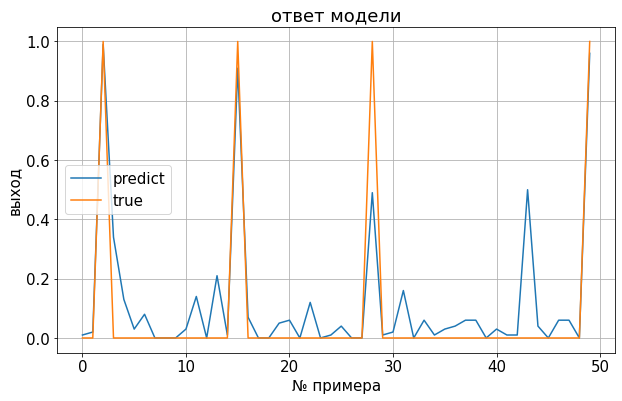

In [202]:
n = 50
plt.figure(figsize=(10, 6))
plt.plot(preds[:n], label='predict')
plt.plot(y_test.values[:n], label='true')
plt.title('ответ модели')
plt.xlabel('№ примера')
plt.ylabel('выход')
plt.legend()
plt.grid('On')
plt.show()

In [203]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print(f'Best Threshold={thresholds[ix]}, F-Score={fscore[ix]:.3f}, Precision={precision[ix]:.3f}, Recall={recall[ix]:.3f}')                                                                        

Best Threshold=0.36, F-Score=0.857, Precision=0.845, Recall=0.869


In [204]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1716   39]
 [  34  211]]


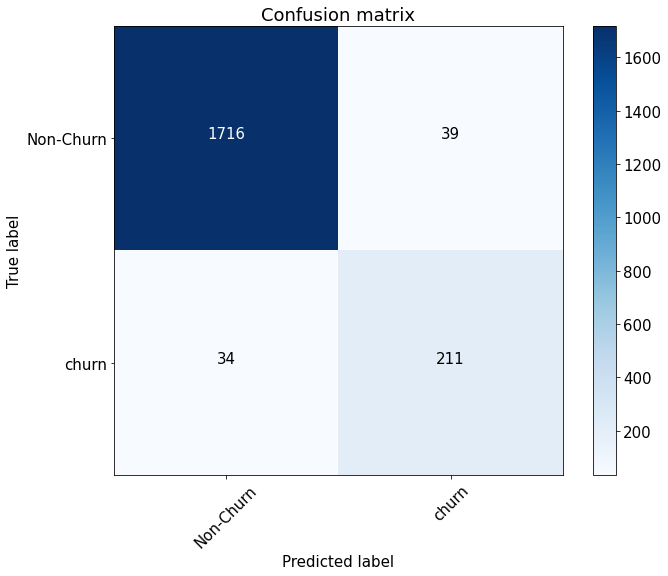

In [205]:
import itertools
# мы уже нашли ранее "оптимальный" порог, когда максимизировали f_score
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, preds > thresholds[ix])

plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-Churn', 'churn'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [206]:
roc_auc = roc_auc_score(y_test, preds)
roc_auc

0.985815454386883

## Домашнее задание

1. *Самостоятельно повторить tfidf (документация https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
2. Модифицировать код функции get_user_embedding таким образом, чтобы считалось не среднее (как в примере np.mean), а медиана. Применить такое преобразование к данным, обучить модель прогнозирования оттока и посчитать метрики качества и сохранить их: roc auc, precision/recall/f_score (для 3 последних - подобрать оптимальный порог)
3. Повторить п.2, но используя уже не медиану, а max
4. *Воспользовавшись полученными знаниями из п.1, повторить пункт 2, но уже взвешивая новости по tfidf (взяв список новостей пользователя)
    - подсказка 1: нужно получить веса-коэффициенты для каждого документа. Не все документы одинаково информативны и несут какой-то положительный сигнал
    - подсказка 2: нужен именно idf, как вес.
5. Сформировать на выходе единую таблицу, сравнивающую качество 2/3 разных метода получения эмбедингов пользователей: median, max, idf_mean по метрикам roc_auc, precision, recall, f_score
6. Сделать самостоятельные выводы и предположения о том, почему тот или ной способ оказался эффективнее остальных

## Дополнительные ссылки

1. http://www.machinelearning.ru/wiki/images/d/d5/Voron17survey-artm.pdf
2. https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation
3. http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/

# Урок 2. Выполнение домашнего задания#

## Задание 2

Модифицировать код функции get_user_embedding таким образом, чтобы считалось не среднее (как в примере np.mean), а медиана. Применить такое преобразование к данным, обучить модель прогнозирования оттока и посчитать метрики качества и сохранить их: roc auc, precision/recall/f_score (для 3 последних - подобрать оптимальный порог)

In [207]:
def get_user_embedding_2(user_articles_list, doc_dict):
    user_articles_list = eval(user_articles_list)
    user_vector = np.array([doc_dict[doc_id] for doc_id in user_articles_list])
    # print(user_vector)
    user_vector = np.median(user_vector, 0)  # медиана
    return user_vector

In [208]:
user_articles_list #= users['articles'].iloc[33]

uv_1 = get_user_embedding(user_articles_list, doc_dict)
uv_2 = get_user_embedding_2(user_articles_list, doc_dict)

print(user_articles_list)
print(uv_1)
print(uv_2)


[323329, 321961, 324743, 323186, 324632, 474690]
[0.         0.00391416 0.06692019 0.03572492 0.01006263 0.1018549
 0.04239333 0.01113035 0.         0.11367644 0.04742722 0.
 0.01024751 0.07885042 0.         0.31765578 0.02785105 0.02171193
 0.03197835 0.06922093]
[0.         0.         0.         0.0245624  0.         0.13023733
 0.         0.00611779 0.         0.06842415 0.         0.
 0.         0.03560684 0.         0.36679664 0.         0.
 0.         0.        ]


In [209]:
%%time
user_embeddings_2 = pd.DataFrame([i for i in users['articles'].apply(lambda x: get_user_embedding_2(x, doc_dict))])
user_embeddings_2.columns = [f'topic_{i}' for i in range(N_topic)]
user_embeddings_2['uid'] = users['uid'].values
user_embeddings_2 = user_embeddings_2[['uid']+[f'topic_{i}' for i in range(N_topic)]]
user_embeddings_2.head(3)

CPU times: user 745 ms, sys: 10.6 ms, total: 756 ms
Wall time: 763 ms


In [210]:
user_embeddings_2.head()

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,u105138,0.000000,0.008616,0.000000,0.000000,0.0,0.063604,0.000000,0.065828,0.114202,...,0.000000,0.048609,0.000000,0.031058,0.000000,0.000000,0.000000,0.000000,0.074497,0.029302
1,u108690,0.018426,0.006498,0.054892,0.009784,0.0,0.092038,0.006301,0.000000,0.000000,...,0.078377,0.000000,0.019717,0.018791,0.000000,0.075160,0.000000,0.022153,0.057821,0.000000
2,u108339,0.000000,0.000000,0.019969,0.000000,0.0,0.199794,0.011225,0.005980,0.009611,...,0.087807,0.000000,0.013619,0.091156,0.000000,0.026495,0.021431,0.000000,0.061848,0.034002
3,u101138,0.020217,0.000000,0.179506,0.092977,0.0,0.000000,0.000000,0.000000,0.000000,...,0.023742,0.078214,0.059795,0.020194,0.009772,0.000000,0.000000,0.000000,0.000000,0.000000
4,u108248,0.000000,0.000000,0.066984,0.000000,0.0,0.033565,0.020003,0.008774,0.025715,...,0.077258,0.005059,0.054052,0.000000,0.000000,0.071174,0.000000,0.000000,0.006435,0.022441


In [211]:
X_2 = pd.merge(user_embeddings_2, target, 'left')
X_2.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,churn
0,u105138,0.000000,0.008616,0.000000,0.000000,0.0,0.063604,0.000000,0.065828,0.114202,...,0.048609,0.000000,0.031058,0.0,0.000000,0.000000,0.000000,0.074497,0.029302,0
1,u108690,0.018426,0.006498,0.054892,0.009784,0.0,0.092038,0.006301,0.000000,0.000000,...,0.000000,0.019717,0.018791,0.0,0.075160,0.000000,0.022153,0.057821,0.000000,1
2,u108339,0.000000,0.000000,0.019969,0.000000,0.0,0.199794,0.011225,0.005980,0.009611,...,0.000000,0.013619,0.091156,0.0,0.026495,0.021431,0.000000,0.061848,0.034002,1


In [212]:
# разделим данные на train/test
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2[[f'topic_{i}' for i in range(N_topic)]], 
                                                    X_2['churn'], random_state=0)

In [213]:
# logreg_2 = LogisticRegression()
logreg_2 = RandomForestClassifier()
# обучим 
logreg_2.fit(X_2_train, y_2_train)

RandomForestClassifier()

In [214]:
# наши прогнозы для тестовой выборки
preds_2 = logreg_2.predict_proba(X_2_test)[:, 1]
preds_2[:10]

array([0.  , 0.  , 0.95, 0.15, 0.01, 0.09, 0.02, 0.  , 0.01, 0.01])

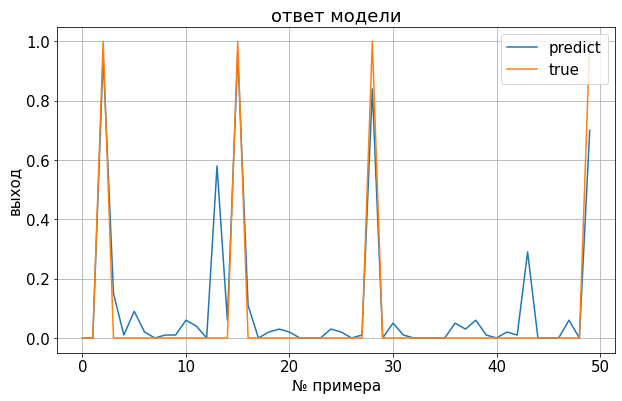

In [215]:
n = 50
plt.figure(figsize=(10, 6))
plt.plot(preds_2[:n], label='predict')
plt.plot(y_2_test.values[:n], label='true')
plt.title('ответ модели')
plt.xlabel('№ примера')
plt.ylabel('выход')
plt.legend()
plt.grid('On')
plt.show()

In [216]:
precision_2, recall_2, thresholds_2 = precision_recall_curve(y_2_test, preds_2)
# print(precision_2 + recall_2)
fscore_2 = (2 * precision_2 * recall_2) / (precision_2 + recall_2)
# locate the index of the largest f score
ix_2 = np.argmax(fscore_2)
print(f'Best Threshold={thresholds_2[ix_2]}, F-Score={fscore_2[ix_2]:.3f}, Precision={precision_2[ix_2]:.3f}, Recall={recall_2[ix_2]:.3f}')      

Best Threshold=0.35, F-Score=0.943, Precision=0.947, Recall=0.939


Confusion matrix, without normalization
[[1743   12]
 [  18  227]]


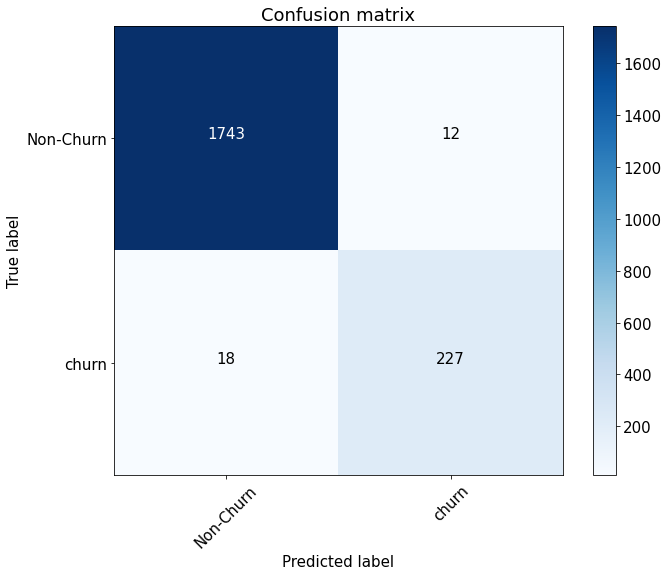

In [217]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_2 = confusion_matrix(y_2_test, preds_2 > thresholds_2[ix_2])

plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_2, classes=['Non-Churn', 'churn'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [218]:
roc_auc_2 = roc_auc_score(y_2_test, preds_2)
roc_auc_2

0.9978684807256236

## Задание 3

Повторить п.2, но используя уже не медиану, а max

In [219]:
def get_user_embedding_3(user_articles_list, doc_dict):
    user_articles_list = eval(user_articles_list)
    user_vector = np.array([doc_dict[doc_id] for doc_id in user_articles_list])
    # print(user_vector)
    user_vector = np.max(user_vector, 0)  # медиана
    return user_vector

In [220]:
user_articles_list #= users['articles'].iloc[33]

uv_1 = get_user_embedding(user_articles_list, doc_dict)
uv_2 = get_user_embedding_2(user_articles_list, doc_dict)
uv_3 = get_user_embedding_3(user_articles_list, doc_dict)

print(user_articles_list)
print(uv_1)
print(uv_2)
print(uv_3)


[323329, 321961, 324743, 323186, 324632, 474690]
[0.         0.00391416 0.06692019 0.03572492 0.01006263 0.1018549
 0.04239333 0.01113035 0.         0.11367644 0.04742722 0.
 0.01024751 0.07885042 0.         0.31765578 0.02785105 0.02171193
 0.03197835 0.06922093]
[0.         0.         0.         0.0245624  0.         0.13023733
 0.         0.00611779 0.         0.06842415 0.         0.
 0.         0.03560684 0.         0.36679664 0.         0.
 0.         0.        ]
[0.         0.02348496 0.24068266 0.0973615  0.06037576 0.19591248
 0.22524489 0.04120253 0.         0.36082795 0.2720637  0.
 0.06148508 0.27684036 0.         0.56477445 0.09405637 0.09638052
 0.16876362 0.36039743]


In [221]:
%%time
user_embeddings_3 = pd.DataFrame([i for i in users['articles'].apply(lambda x: get_user_embedding_3(x, doc_dict))])
user_embeddings_3.columns = [f'topic_{i}' for i in range(N_topic)]
user_embeddings_3['uid'] = users['uid'].values
user_embeddings_3 = user_embeddings_3[['uid']+[f'topic_{i}' for i in range(N_topic)]]
user_embeddings_3.head(3)

CPU times: user 307 ms, sys: 7.56 ms, total: 315 ms
Wall time: 320 ms


In [222]:
user_embeddings_3.head()

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,u105138,0.192849,0.096471,0.019972,0.057074,0.058144,0.393664,0.082863,0.149707,0.372284,...,0.114053,0.495969,0.116236,0.147415,0.032030,0.170367,0.183511,0.072360,0.154005,0.224605
1,u108690,0.180723,0.065891,0.110717,0.112104,0.000000,0.361233,0.161606,0.074172,0.224478,...,0.158870,0.023165,0.193413,0.092931,0.025674,0.537115,0.000000,0.060882,0.144340,0.000000
2,u108339,0.000000,0.023196,0.095619,0.059120,0.049465,0.306750,0.048866,0.098970,0.167111,...,0.246443,0.022391,0.041575,0.256205,0.028726,0.196867,0.289621,0.000000,0.211329,0.102881
3,u101138,0.169411,0.118970,0.352726,0.323145,0.113010,0.530615,0.000000,0.000000,0.000000,...,0.269220,0.261213,0.237955,0.509759,0.205706,0.024984,0.061630,0.031140,0.000000,0.282415
4,u108248,0.245501,0.271339,0.223618,0.027721,0.149671,0.195235,0.170732,0.522917,0.085069,...,0.205161,0.069495,0.070011,0.054322,0.020897,0.223818,0.142533,0.149782,0.074078,0.048325


In [223]:
X_3 = pd.merge(user_embeddings_3, target, 'left')
X_3.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,churn
0,u105138,0.192849,0.096471,0.019972,0.057074,0.058144,0.393664,0.082863,0.149707,0.372284,...,0.495969,0.116236,0.147415,0.032030,0.170367,0.183511,0.072360,0.154005,0.224605,0
1,u108690,0.180723,0.065891,0.110717,0.112104,0.000000,0.361233,0.161606,0.074172,0.224478,...,0.023165,0.193413,0.092931,0.025674,0.537115,0.000000,0.060882,0.144340,0.000000,1
2,u108339,0.000000,0.023196,0.095619,0.059120,0.049465,0.306750,0.048866,0.098970,0.167111,...,0.022391,0.041575,0.256205,0.028726,0.196867,0.289621,0.000000,0.211329,0.102881,1


In [224]:
# разделим данные на train/test
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3[[f'topic_{i}' for i in range(N_topic)]], 
                                                    X_3['churn'], random_state=0)

In [225]:
# logreg_3 = LogisticRegression()
logreg_3 = RandomForestClassifier()
# обучим 
logreg_3.fit(X_3_train, y_3_train)

RandomForestClassifier()

In [226]:
# наши прогнозы для тестовой выборки
preds_3 = logreg_3.predict_proba(X_3_test)[:, 1]
preds_3[:10]

array([0.02, 0.01, 0.81, 0.39, 0.02, 0.06, 0.  , 0.  , 0.  , 0.07])

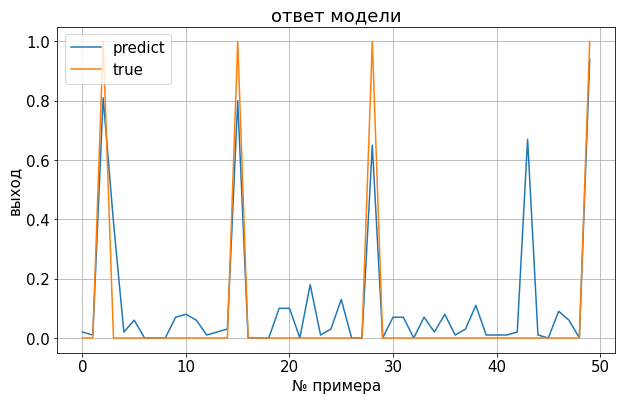

In [227]:
n = 50
plt.figure(figsize=(10, 6))
plt.plot(preds_3[:n], label='predict')
plt.plot(y_3_test.values[:n], label='true')
plt.title('ответ модели')
plt.xlabel('№ примера')
plt.ylabel('выход')
plt.legend()
plt.grid('On')
plt.show()

In [228]:
precision_3, recall_3, thresholds_3 = precision_recall_curve(y_test, preds_3)
# print(precision_2 + recall_2)
fscore_3 = (2 * precision_3 * recall_3) / (precision_3 + recall_3)
# locate the index of the largest f score
ix_3 = np.argmax(fscore_3)
print(f'Best Threshold={thresholds_3[ix_3]}, F-Score={fscore_3[ix_3]:.3f}, Precision={precision_3[ix_3]:.3f}, Recall={recall_3[ix_3]:.3f}')      

Best Threshold=0.33, F-Score=0.836, Precision=0.812, Recall=0.861


Confusion matrix, without normalization
[[1709   46]
 [  39  206]]


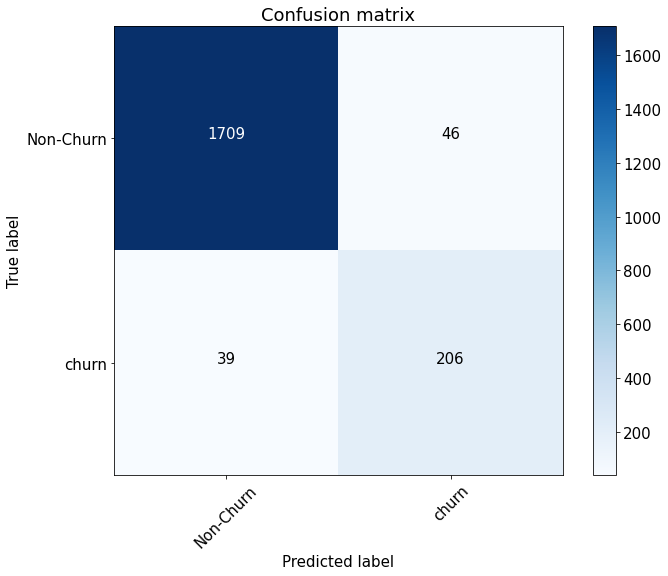

In [229]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_3 = confusion_matrix(y_3_test, preds_3 > thresholds_3[ix_3])

plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_3, classes=['Non-Churn', 'churn'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [230]:
roc_auc_3 = roc_auc_score(y_3_test, preds_3)
roc_auc_3

0.9804953776382348

## Задание 4

*Воспользовавшись полученными знаниями из п.1, повторить пункт 2, но уже взвешивая новости по tfidf (взяв список новостей пользователя)
подсказка 1: нужно получить веса-коэффициенты для каждого документа. Не все документы одинаково информативны и несут какой-то положительный сигнал
подсказка 2: нужен именно idf, как вес.

In [231]:
from gensim.models import LdaModel, TfidfModel


In [232]:
# Считаем tf-idf значения для каждого слова в каждом документе.

tfidf_model = TfidfModel(common_corpus)
common_corpus_tfidf = [tfidf_model[doc] for doc in common_corpus]

In [233]:
# Тренируем LDA на tf-idf корпусе.

lda_tfidf = LdaModel(common_corpus_tfidf, num_topics=25, id2word=common_dictionary)

In [234]:
# Получаем эмбеддинги документов по темам, с учетом подсчета для нового документа значений tf-idf.
def get_lda_vector_tfidf(text):
    unseen_doc = tfidf_model[common_dictionary.doc2bow(text)]
    lda_tuple = lda_tfidf[unseen_doc]
    not_null_topics = dict(zip([i[0] for i in lda_tuple], [i[1] for i in lda_tuple]))

    output_vector = []
    for i in range(N_topic):
        if i not in not_null_topics:
            output_vector.append(0)
        else:
            output_vector.append(not_null_topics[i])
    return np.array(output_vector)

In [235]:
topic_matrix_tfidf = pd.DataFrame([get_lda_vector_tfidf(text) for text in news['title'].values])
topic_matrix_tfidf.columns = ['topic_{}'.format(i) for i in range(N_topic)]
topic_matrix_tfidf['doc_id'] = news['doc_id'].values
topic_matrix_tfidf = topic_matrix_tfidf[['doc_id']+['topic_{}'.format(i) for i in range(N_topic)]]
doc_dict = dict(zip(topic_matrix_tfidf['doc_id'].values, topic_matrix_tfidf[['topic_{}'.format(i) for i in range(N_topic)]].values))

In [236]:
%%time
user_embeddings_4 = pd.DataFrame([i for i in users['articles'].apply(lambda x: get_user_embedding(x, doc_dict))])
user_embeddings_4.columns = [f'topic_{i}' for i in range(N_topic)]
user_embeddings_4['uid'] = users['uid'].values
user_embeddings_4 = user_embeddings_4[['uid']+[f'topic_{i}' for i in range(N_topic)]]
user_embeddings_4.head(3)

CPU times: user 368 ms, sys: 4.11 ms, total: 372 ms
Wall time: 371 ms


In [237]:
user_embeddings_4.head()

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,u105138,0.016567,0.015930,0.003774,0.023851,0.007384,0.003529,0.056729,0.004346,0.078378,...,0.331875,0.066988,0.003131,0.003776,0.013957,0.042928,0.089798,0.008616,0.013647,0.011726
1,u108690,0.001907,0.013705,0.011357,0.014126,0.007688,0.006168,0.084791,0.005029,0.121165,...,0.398047,0.003644,0.004688,0.003634,0.066238,0.052929,0.020481,0.000000,0.046356,0.002302
2,u108339,0.008621,0.013346,0.003368,0.000000,0.012670,0.008944,0.137867,0.002089,0.111555,...,0.303839,0.025736,0.000000,0.000000,0.012748,0.109229,0.026180,0.000000,0.007567,0.001892
3,u101138,0.000000,0.000000,0.000000,0.000000,0.014658,0.008958,0.037306,0.003535,0.090260,...,0.433297,0.002138,0.000000,0.000000,0.021529,0.034844,0.038479,0.069549,0.005824,0.006365
4,u108248,0.002452,0.012261,0.001951,0.000000,0.007242,0.013403,0.058511,0.001740,0.075843,...,0.329619,0.025842,0.004746,0.008948,0.019220,0.120436,0.091254,0.002793,0.023401,0.005180


In [238]:
X_4 = pd.merge(user_embeddings_4, target, 'left')
X_4.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,churn
0,u105138,0.016567,0.015930,0.003774,0.023851,0.007384,0.003529,0.056729,0.004346,0.078378,...,0.066988,0.003131,0.003776,0.013957,0.042928,0.089798,0.008616,0.013647,0.011726,0
1,u108690,0.001907,0.013705,0.011357,0.014126,0.007688,0.006168,0.084791,0.005029,0.121165,...,0.003644,0.004688,0.003634,0.066238,0.052929,0.020481,0.000000,0.046356,0.002302,1
2,u108339,0.008621,0.013346,0.003368,0.000000,0.012670,0.008944,0.137867,0.002089,0.111555,...,0.025736,0.000000,0.000000,0.012748,0.109229,0.026180,0.000000,0.007567,0.001892,1


In [239]:
# разделим данные на train/test
X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(X_4[[f'topic_{i}' for i in range(N_topic)]], 
                                                    X_4['churn'], random_state=0)

In [240]:
# logreg_4 = LogisticRegression(random_state=0) # LogisticRegression выдавал предсказания, которые не позволяли рассчитать f1 score
logreg_4 = RandomForestClassifier()
# обучим 
logreg_4.fit(X_4_train, y_4_train)

RandomForestClassifier()

In [241]:
# наши прогнозы для тестовой выборки
preds_4 = logreg_4.predict_proba(X_4_test)[:, 1]
preds_4[:10]

array([0.13, 0.01, 0.97, 0.53, 0.01, 0.13, 0.14, 0.  , 0.  , 0.14])

In [242]:
print(preds_4)

[0.13 0.01 0.97 ... 0.   0.09 0.  ]


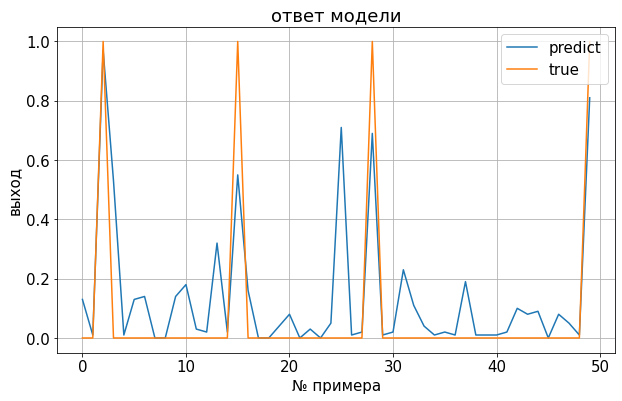

In [243]:
n = 50
plt.figure(figsize=(10, 6))
plt.plot(preds_4[:n], label='predict')
plt.plot(y_4_test.values[:n], label='true')
plt.title('ответ модели')
plt.xlabel('№ примера')
plt.ylabel('выход')
plt.legend()
plt.grid('On')
plt.show()

In [244]:
# precision_4, recall_4, thresholds_4 = precision_recall_curve(y_test, np.round(abs(preds_4))) #preds_4)
precision_4, recall_4, thresholds_4 = precision_recall_curve(y_test, preds_4)
fscore_4 = (2 * precision_4 * recall_4) / (precision_4 + recall_4)
# locate the index of the largest f score
ix_4 = np.argmax(fscore_4)
print(f'Best Threshold={thresholds_4[ix_4]}, F-Score={fscore_4[ix_4]:.3f}, Precision={precision_4[ix_4]:.3f}, Recall={recall_4[ix_4]:.3f}')      

Best Threshold=0.31, F-Score=0.731, Precision=0.709, Recall=0.755


Confusion matrix, without normalization
[[1684   71]
 [  64  181]]


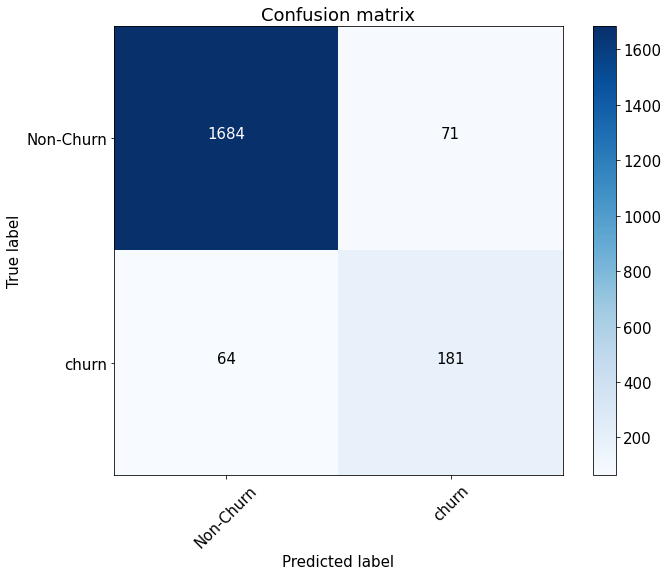

In [249]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_4 = confusion_matrix(y_4_test, preds_4 > thresholds_4[ix_4])

plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_4, classes=['Non-Churn', 'churn'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [250]:
roc_auc_4 = roc_auc_score(y_4_test, preds_4)
roc_auc_4

0.9516832373975231

## Задание 5

Сформировать на выходе единую таблицу, сравнивающую качество 2/3 разных метода получения эмбедингов пользователей: mean, median, max, idf_mean по метрикам roc_auc, precision, recall, f_score

In [251]:
df=pd.DataFrame(
    {
        'methods':['mean', 'median','max','idf_mean ']
        ,'roc_auc':[roc_auc, roc_auc_2, roc_auc_3, roc_auc_4]
        ,'precision': [precision[ix], precision_2[ix_2], precision_3[ix_3], precision_4[ix_4]]
        ,'recall': [recall[ix], recall_2[ix_2], recall_3[ix_3], recall_4[ix_4]]
        ,'f_score': [fscore[ix], fscore_2[ix_2], fscore_3[ix_3], fscore_4[ix_4]]
    }
)
df

,methods,roc_auc,precision,recall,f_score
0,mean,0.985815,0.845238,0.869388,0.857143
1,median,0.997868,0.946502,0.938776,0.942623
2,max,0.980495,0.811538,0.861224,0.835644
3,idf_mean,0.951683,0.708812,0.755102,0.731225


## Задание 6

Сделать самостоятельные выводы и предположения о том, почему тот или ной способ оказался эффективнее остальных

Можно заметить, что получение user embeddings по медиане сработало лучше, чем по максимальному значению или среднему.

Получение embeddings по медиане работает лучше, т.к. сама медиана более устойчива к выбросам. И случайно просмотренная статья с "тяжелой" тематикой может значительно изменить предсказания алгоритма. Но не в случае медианы.

Среднее по tf-idf сработало хуже чем любой bag-of-words. Возможно тексты в данном датасете слишком короткие, что ухудшает качество работы tf-idf.